## K- Nearest neighbours(KNN)

In [1]:
# import the packages
import pandas as pd

In [2]:
# read the dataset
data = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")

In [3]:
data

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [4]:
data.shape

(18, 3)

In [5]:
data.columns

Index(['Height', 'Weight', 'Size'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
Height    18 non-null int64
Weight    18 non-null int64
Size      18 non-null object
dtypes: int64(2), object(1)
memory usage: 512.0+ bytes


In [7]:
data.isnull().sum()

Height    0
Weight    0
Size      0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
data["Size"].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [ ]:
# seperating features and target

In [11]:
data.columns

Index(['Height', 'Weight', 'Size'], dtype='object')

In [12]:
inpu = data[["Height","Weight"]]
inpu

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [13]:
out = data["Size"]
out

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: Size, dtype: object

In [14]:
# visuvalize the data
import seaborn as sns

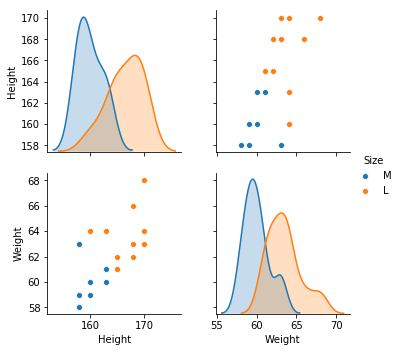

In [16]:
sns.pairplot(data,hue = "Size")

In [ ]:
# get_dummies
# one hot encoder
# label encoder

In [17]:
pd.get_dummies(out)

,L,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,1,0
9,1,0


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label = LabelEncoder()

In [20]:
d = label.fit_transform(out)
d

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
data["Size"] = d

In [22]:
data

,Height,Weight,Size
0,158,58,1
1,158,59,1
2,158,63,1
3,160,59,1
4,160,60,1
5,163,60,1
6,163,61,1
7,160,64,0
8,163,64,0
9,165,61,0


In [23]:
out = data["Size"]

In [24]:
out

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: Size, dtype: int32

In [25]:
# import the model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of th

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(inpu,out)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
# predict the model
pred = knn.predict(inpu)

In [31]:
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [32]:
from sklearn import metrics

In [33]:
print(dir(metrics))

['SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'base', 'brier_score_loss', 'calinski_harabaz_score', 'check_scoring', 'classification', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'davies_bouldin_score', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_similarity_score', 'label_ranking_average_precision_score', 'label_ranking_loss', 'log_loss', 'make_scorer', 'matthews_corrcoef', 'mean_absolute_error', 'mean_squared_error', 'mean_squared_log_error', 'median_absolute_error', 'mutual_info_score', 'normalized_mutu

In [34]:
metrics.accuracy_score(out,pred)*100

83.33333333333334

In [36]:
print(metrics.classification_report(out,pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.83      0.71      0.77         7

   micro avg       0.83      0.83      0.83        18
   macro avg       0.83      0.81      0.82        18
weighted avg       0.83      0.83      0.83        18



In [37]:
metrics.confusion_matrix(out,pred)

array([[10,  1],
       [ 2,  5]], dtype=int64)

### Multi-class classification

In [38]:
data1 = pd.read_excel("winequality-red.xls")

In [42]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
data1.shape

(1744, 12)

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 12 columns):
fixed acidity           1744 non-null float64
volatile acidity        1744 non-null float64
citric acid             1744 non-null float64
residual sugar          1744 non-null float64
chlorides               1744 non-null float64
free sulfur dioxide     1744 non-null float64
total sulfur dioxide    1744 non-null float64
density                 1744 non-null float64
pH                      1744 non-null float64
sulphates               1744 non-null float64
alcohol                 1744 non-null float64
quality                 1744 non-null int64
dtypes: float64(11), int64(1)
memory usage: 163.6 KB


In [45]:
data1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
data1["quality"].value_counts()

5    716
6    647
7    224
4     90
8     46
3     21
Name: quality, dtype: int64

In [49]:
# seperating features and target
features = data1.drop(["quality"],axis=1)

In [50]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [51]:
target = data1["quality"]

In [53]:
target.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [57]:
o = label.fit_transform(target)
o

array([2, 2, 2, ..., 2, 3, 2], dtype=int64)

In [58]:
data1["quality"] = o

In [59]:
data1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [60]:
target = data1["quality"]

In [61]:
data1.shape

(1744, 12)

In [62]:
# splitting the data for training and testing

In [63]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.33,random_state=5)

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn1 = KNeighborsClassifier(n_neighbors=3)

In [106]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [107]:
pred1 = knn1.predict(x_train)

In [108]:
pred1

array([2, 4, 4, ..., 4, 2, 2], dtype=int64)

In [109]:
knn1.predict(x_test)

array([3, 3, 1, 3, 1, 2, 3, 3, 3, 3, 4, 3, 3, 4, 2, 1, 2, 2, 2, 2, 2, 4,
       2, 5, 2, 3, 5, 4, 2, 4, 2, 3, 2, 2, 3, 4, 3, 3, 2, 5, 4, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 3, 3, 2, 3, 4, 3, 3,
       3, 2, 2, 3, 2, 3, 2, 4, 3, 3, 3, 3, 4, 1, 2, 2, 4, 2, 3, 3, 2, 2,
       3, 3, 4, 2, 5, 4, 0, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 4,
       4, 4, 2, 2, 2, 1, 2, 3, 1, 1, 2, 2, 2, 3, 1, 2, 2, 2, 4, 4, 1, 4,
       2, 2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 5, 4, 2, 3, 3, 1, 2, 2, 3, 2, 1,
       3, 2, 3, 3, 2, 3, 3, 2, 2, 4, 1, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2,
       2, 2, 2, 5, 2, 3, 3, 3, 2, 3, 2, 3, 4, 3, 2, 3, 5, 2, 3, 3, 2, 3,
       2, 2, 2, 3, 3, 1, 4, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 5, 2, 2, 1,
       2, 3, 1, 3, 2, 2, 2, 5, 2, 2, 1, 2, 3, 4, 1, 3, 4, 3, 3, 2, 2, 2,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 3, 4, 2, 2, 1, 3, 4, 2,
       5, 4, 3, 1, 1, 1, 3, 2, 1, 2, 2, 2, 3, 2, 3,

In [110]:
metrics.accuracy_score(y_train,pred1)

0.7320205479452054

In [111]:
metrics.confusion_matrix(y_train,pred1)

array([[ 14,   0,   0,   0,   0,   0],
       [  1,  34,  12,  10,   2,   0],
       [  1,  12, 391,  65,   5,   0],
       [  3,  14, 100, 307,  21,   1],
       [  2,   1,  27,  23,  90,   1],
       [  0,   1,   5,   6,   0,  19]], dtype=int64)

### Logistic Regression

In [112]:
import pandas as pd

In [114]:
from sklearn import datasets

In [116]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2'

In [117]:
cancer = datasets.load_breast_cancer()

In [118]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [121]:
# selecting features and target

input_data = pd.DataFrame(cancer["data"],columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'])

In [122]:
input_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [123]:
input_data.shape

(569, 30)

In [125]:
output_data = pd.DataFrame(cancer["target"],columns=["target"])

In [126]:
output_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [128]:
output_data["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

In [129]:
output_data.isnull().sum()

target    0
dtype: int64

In [130]:
input_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [131]:
# splitting the data for training and testing

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data,
                                                 test_size=0.3,random_state=3)

In [134]:
# select the model

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
log = LogisticRegression()

In [137]:
log.fit(x_train,y_train)

C:\Users\Alekhya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Alekhya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [138]:
pred2 = log.predict(x_test)
pred2

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [141]:
metrics.accuracy_score(y_test,pred2)

0.9473684210526315

In [142]:
metrics.confusion_matrix(y_test,pred2)

array([[ 57,   5],
       [  4, 105]], dtype=int64)

In [143]:
print(metrics.classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        62
           1       0.95      0.96      0.96       109

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

